## Com carregar dades de covid a Catalunya

In [1]:
# Baixa les dades
import requests

url = 'https://analisi.transparenciacatalunya.cat/api/views/c7sd-zy9j/rows.json?accessType=DOWNLOAD'
r = requests.get(url)

In [2]:
# Guarda-les
bin_data = r.content

with open("COVID-2021_Catalunya_comarcas.json", "wb") as f:
    f.write(bin_data)

In [3]:
# Carrega les dades
import json

j = json.loads(bin_data.decode())

In [4]:
# Crea un data frame
import pandas as pd

cols = [j['meta']['view']['columns'][i]['name'] for i in range(21)]
print(cols)

df = pd.DataFrame(j['data'], columns=cols)
df

['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'NOM', 'CODI', 'DATA', 'SEXE', 'GRUP_EDAT', 'RESIDENCIA', 'CASOS_CONFIRMAT', 'PCR', 'INGRESSOS_TOTAL', 'INGRESSOS_CRITIC', 'INGRESSATS_TOTAL', 'INGRESSATS_CRITIC', 'EXITUS']


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,NOM,CODI,...,SEXE,GRUP_EDAT,RESIDENCIA,CASOS_CONFIRMAT,PCR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS
0,row-gbgz~jhcq.k2ma,00000000-0000-0000-6DD2-5C2433709158,0,1627210997,None,1627210997,None,{ },MONTSIA,22,...,Tots,Tots,Si,0,2,0,0,0,0,0
1,row-aj7e-n5nb_igs5,00000000-0000-0000-56D0-579CF78B49C7,0,1625396587,None,1625396587,None,{ },CONCA DE BARBERA,16,...,Dona,60 a 69,No,0,1,0,0,0,0,0
2,row-vv5w-mdaf_9byv,00000000-0000-0000-6CD2-5A36318A3090,0,1646391812,None,1646391812,None,{ },GIRONES,20,...,Dona,50 a 59,No,9,55,0,0,0,0,0
3,row-qqyr_782h-7ep2,00000000-0000-0000-9ABC-751931F81F69,0,1627210997,None,1627210997,None,{ },CONCA DE BARBERA,16,...,Home,20 a 29,No,1,4,0,0,0,0,0
4,row-assg~655d.iz2u,00000000-0000-0000-6FA8-56BA9AB9D386,0,1647601413,None,1647601413,None,{ },ALT EMPORDA,02,...,Dona,50 a 59,No,6,66,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663128,row-n48g-v38c_i7h5,00000000-0000-0000-63BD-2770FE54E8F7,0,1647169407,None,1647169407,None,{ },BAIX PENEDES,12,...,Home,80 o més,No,0,13,1,0,7,0,0
663129,row-asj9-fmjd.qu2w,00000000-0000-0000-9AFB-ECAB41E2AD5C,0,1647169407,None,1647169407,None,{ },BAIX PENEDES,12,...,Dona,30 a 39,No,1,37,0,0,2,0,0
663130,row-9c77-erd5~zdpx,00000000-0000-0000-8BA9-694313987DE0,0,1647169407,None,1647169407,None,{ },OSONA,24,...,Dona,60 a 69,No,5,45,0,0,7,1,0
663131,row-fp96~5uh6-26dp,00000000-0000-0000-2689-68896BD00113,0,1647169407,None,1647169407,None,{ },CERDANYA,15,...,Home,60 a 69,No,0,7,0,0,0,0,0


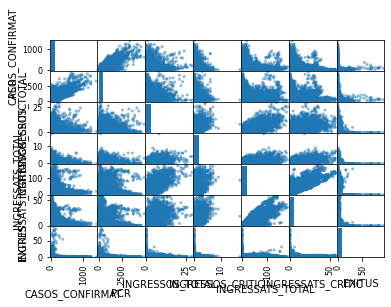

In [5]:
# Acomoda les dades
df['DATA'] = pd.to_datetime(df['DATA'])

camps = ['CASOS_CONFIRMAT', 'PCR', 'INGRESSOS_TOTAL', 'INGRESSOS_CRITIC', 'INGRESSATS_TOTAL', 'INGRESSATS_CRITIC', 'EXITUS']
data_cols = []
for c in camps:
    df[c] = df[c].astype(float)

l = pd.plotting.scatter_matrix(df[camps])

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg